In [82]:
# Final Project of DSP course by taeghim
# Libary import
import IPython
from scipy.io import wavfile
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt
import librosa.display  # Library for audio & sound

In [83]:
# Load the target voice 
voice_test = "voice_test.wav"
voice_rate, voice_data = wavfile.read(voice_test) # sampling rate & data
voice = voice_data / 32768 # bit rate

In [84]:
# Load the cafe noise
cafe_short = "cafe_short.wav"
cafe_rate, cafe_data = wavfile.read(cafe_short)
cafe = cafe_data /32786
cafe = np.append(cafe, np.array(cafe)) #twice the length of playtime
cafe = cafe[:len(voice)] #cut cafe noise to make same as voice length

In [116]:
# Extract RMSE with librosa
FRAME_LENGTH = 1024
HOP_LENGTH = 512

rms_cafe = librosa.feature.rms(cafe, frame_length = FRAME_LENGTH, hop_length = HOP_LENGTH)[0]

In [117]:
IPython.display.Audio(data=cafe, rate=cafe_rate, autoplay=False)

Text(0.5, 1.0, 'Cafe Noise RMS')

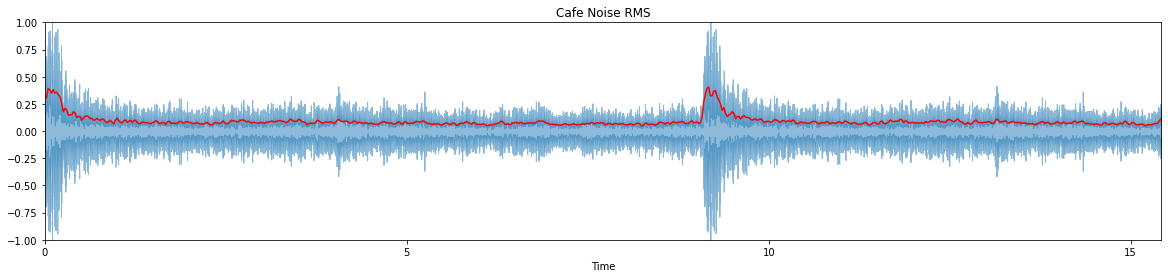

In [118]:
# Plot RMSE 
frames = range(len(rms_cafe))
t = librosa.frames_to_time(frames, hop_length = HOP_LENGTH)
plt.figure(figsize=(20,4))

librosa.display.waveplot(cafe, alpha=0.5)
plt.plot(t, rms_cafe, color="r")
plt.ylim((-1,1))
plt.title("Cafe Noise RMS")

Text(0.5, 1.0, 'Inverse Cafe Noise RMS')

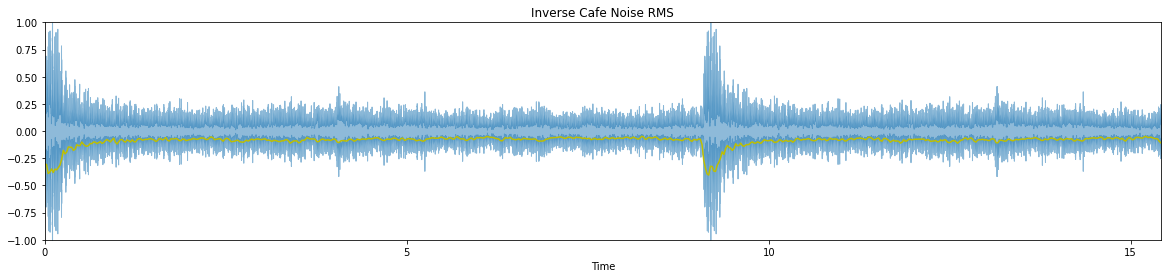

In [119]:
# Invert cafe noise RMS
invert_rms_cafe = -rms_cafe
plt.figure(figsize=(20,4))

librosa.display.waveplot(cafe, alpha=0.5)
plt.plot(t, invert_rms_cafe, color="y")
plt.ylim((-1,1))
plt.title("Inverse Cafe Noise RMS")

In [141]:
# Custom RMS Coefficient Hyper-Parameter
RMS_COEFF = 20

In [142]:
# Noise Reduction Test
cafe_noise_cancel = []
for i in range(0, len(invert_rms_cafe), 1):
  cafe_noise_cancel_ = np.add(cafe[HOP_LENGTH*i : HOP_LENGTH*(i+1)], invert_rms_cafe[i]*RMS_COEFF)
  cafe_noise_cancel = np.append(cafe_noise_cancel, np.array(cafe_noise_cancel_))

IPython.display.Audio(data=cafe_noise_cancel, rate=cafe_rate, autoplay=True)


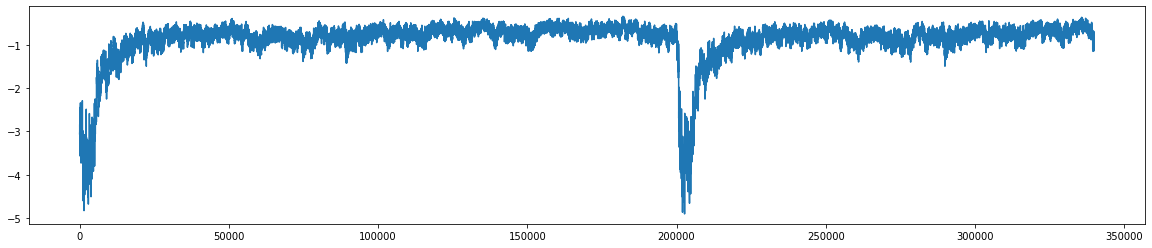

In [127]:
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(cafe_noise_cancel)

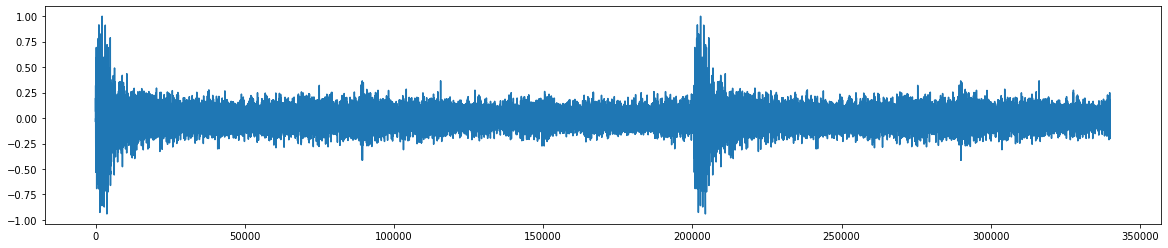

In [128]:
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(cafe)

In [115]:
# RMS from Scratch
def rms(signal, frame_length, hop_length):
  rms = []
  for i in range(0, len(signal), hop_length):
    rms_current_frame = np.sqrt(np.sum(signal[i:i+frame_length]**2/frame_length))
    rms.append(rms_current_frame)
  return np.array(rms)

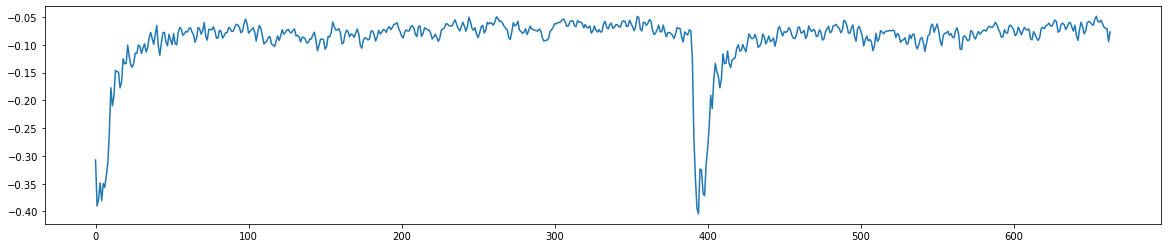

In [132]:
scratch_rms_cafe = rms(cafe, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
invert_scratch_rms_cafe = -scratch_rms_cafe
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(invert_scratch_rms_cafe)

In [140]:
cafe_noise_cancel_scratch = []
for i in range(0, len(scratch_rms_cafe), 1):
  cafe_noise_cancel_scratch_ = np.add(cafe[HOP_LENGTH*i : HOP_LENGTH*(i+1)], invert_scratch_rms_cafe[i]*RMS_COEFF)
  cafe_noise_cancel_scratch = np.append(cafe_noise_cancel_scratch, np.array(cafe_noise_cancel_scratch_))

IPython.display.Audio(data=cafe_noise_cancel_scratch, rate=cafe_rate, autoplay=True)

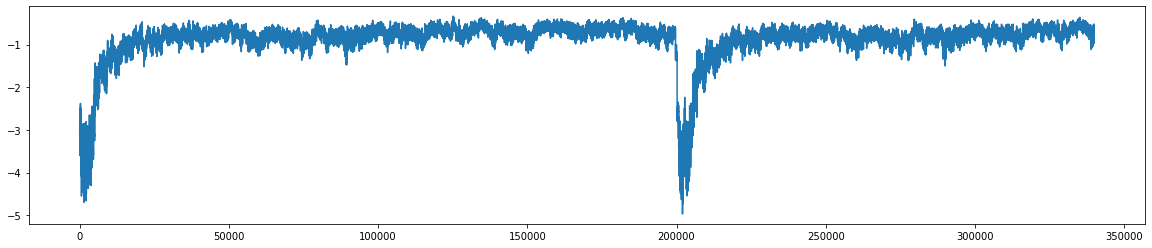

In [136]:
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(cafe_noise_cancel_scratch)

In [146]:
noisy_sound = voice + cafe
IPython.display.Audio(data=noisy_sound, rate=voice_rate, autoplay = True)

In [149]:
noisy_sound_canceled = voice + cafe_noise_cancel
IPython.display.Audio(data=noisy_sound_canceled, rate=voice_rate, autoplay = True)

In [150]:
noisy_sound_canceled_scratch = voice + cafe_noise_cancel_scratch
IPython.display.Audio(data=noisy_sound_canceled_scratch, rate=voice_rate, autoplay = True)